In [28]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

nsample = 20
x = np.linspace(0, 10, nsample)
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

一元线性回归

In [29]:
X = sm.add_constant(x)
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.52631579],
       [ 1.        ,  1.05263158],
       [ 1.        ,  1.57894737],
       [ 1.        ,  2.10526316],
       [ 1.        ,  2.63157895],
       [ 1.        ,  3.15789474],
       [ 1.        ,  3.68421053],
       [ 1.        ,  4.21052632],
       [ 1.        ,  4.73684211],
       [ 1.        ,  5.26315789],
       [ 1.        ,  5.78947368],
       [ 1.        ,  6.31578947],
       [ 1.        ,  6.84210526],
       [ 1.        ,  7.36842105],
       [ 1.        ,  7.89473684],
       [ 1.        ,  8.42105263],
       [ 1.        ,  8.94736842],
       [ 1.        ,  9.47368421],
       [ 1.        , 10.        ]])

In [30]:
# β0,β1分别设置成2,5
beta = np.array([2,5])
beta

array([2, 5])

In [31]:
# 给定一个高斯误差E
e = np.random.normal(loc=0, scale=0.01, size=nsample)
e 

array([-7.61976317e-03,  1.94259769e-05,  8.23374932e-03, -1.88285005e-03,
        9.83877619e-05,  1.49752696e-03, -8.64452088e-03, -4.58501785e-03,
        5.98739376e-03, -3.29765428e-03,  1.23144116e-02,  6.50696853e-03,
       -8.10032908e-03, -1.96549809e-02,  7.72201779e-03,  1.25311649e-02,
        3.50225726e-03,  7.61095307e-03, -2.22672973e-02,  8.90433028e-03])

In [32]:
# 实际值y
y = np.dot(X, beta) + e
y

array([ 1.99238024,  4.63159837,  7.27139164,  9.89285399, 12.52641418,
       15.15939226, 17.78082916, 20.41646761, 23.05861897, 25.68091287,
       28.32810389, 30.95387539, 33.57084704, 36.19087133, 38.84982728,
       41.48621538, 44.10876542, 46.74445306, 49.34615376, 52.00890433])

In [33]:
# 最小二乘法
model = sm.OLS(y, X)

In [34]:
# 拟合数据
res = model.fit()

In [35]:
# 回归系数
res.params

array([1.9991506 , 5.00015864])

In [36]:
# 全部结果
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.664e+07
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           3.52e-59
Time:                        15:52:01   Log-Likelihood:                 64.905
No. Observations:                  20   AIC:                            -125.8
Df Residuals:                      18   BIC:                            -123.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9992      0.004    466.849      0.000       1.990       2.008
x1             5.0002      0.001   6829.591      0.000       4.999       5.002
==============================================================================
Omnibus:                        4.370   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                2.809
Skew:                          -0.911   Prob(JB):                        0.246
Kurtosis:                       3.221   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# 拟合的估计值
y_ = res.fittedvalues
y_

array([ 1.9991506 ,  4.63081304,  7.26247548,  9.89413793, 12.52580037,
       15.15746281, 17.78912526, 20.4207877 , 23.05245014, 25.68411259,
       28.31577503, 30.94743747, 33.57909992, 36.21076236, 38.8424248 ,
       41.47408725, 44.10574969, 46.73741214, 49.36907458, 52.00073702])

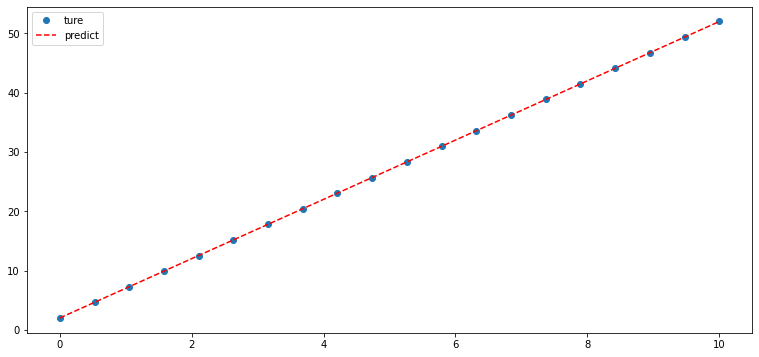

In [38]:
# 设置画布大小
plt.figure(figsize=(13, 6))
plt.plot(x, y, 'o', label='ture')
plt.plot(x, y_, 'r--', label='predict')
plt.legend(loc='best')
plt.show()

高阶回归

In [39]:
nsample = 50
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))
X = sm.add_constant(X)
beta = np.array([5,2,3])
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e

model = sm.OLS(y, X)
res = model.fit()
res.params

array([5.47610415, 1.94492383, 3.00019776])

In [40]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.159e+05
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           7.33e-94
Time:                        15:52:21   Log-Likelihood:                -71.503
No. Observations:                  50   AIC:                             149.0
Df Residuals:                      47   BIC:                             154.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4761      0.425     12.874      0.000       4.620       6.332
x1             1.9449      0.197      9.887      0.000       1.549       2.341
x2             3.0002      0.019    157.704      0.000       2.962       3.038
==============================================================================
Omnibus:                        0.862   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.904
Skew:                          -0.181   Prob(JB):                        0.636
Kurtosis:                       2.449   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

分类变量

In [41]:
nsample = 50
groups = np.zeros(nsample,int)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [42]:
groups[20:40] = 1
groups[40:] = 2
dummy = sm.categorical(groups, drop=True)
dummy

c:\python3.10.5\lib\site-packages\statsmodels\tools\tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [43]:
# y = 5 + 2x + 3z1 + 6z2 + 9z3
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, dummy))
X = sm.add_constant(X)
beta = np.array([5,2,3,6,9])
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e

model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     5666.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           4.54e-59
Time:                        15:52:31   Log-Likelihood:                -53.717
No. Observations:                  50   AIC:                             115.4
Df Residuals:                      46   BIC:                             123.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2307      0.419     19.667      0.000       7.388       9.073
x1             1.9974      0.048     41.481      0.000       1.900       2.094
x2             0.0708      0.265      0.267      0.791      -0.463       0.605
x3             2.8662      0.222     12.922      0.000       2.420       3.313
x4             5.2937      0.500     10.594      0.000       4.288       6.300
==============================================================================
Omnibus:                        0.640   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.198
Skew:                           0.129   Prob(JB):                        0.906
Kurtosis:                       3.168   Cond. No.                     1.04e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.27e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

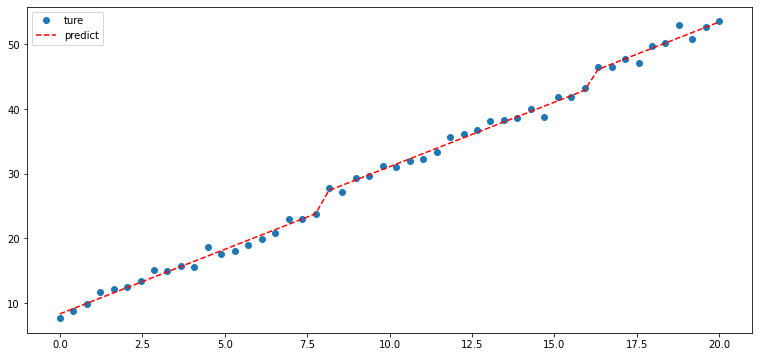

In [44]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(x, y, 'o', label='ture')
ax.plot(x, res.fittedvalues, 'r--', label='predict')
ax.legend(loc='best')
plt.show()